In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(rc={'figure.figsize':(11.7,8.27)})
pd.options.display.float_format = '{:20,.2f}'.format
import os
import chardet

In [2]:
data = pd.read_csv('./I2020.csv', encoding='ANSI', sep='\t')

In [3]:
data.head()

,IdMedDocument,Name,systemGuid,idLpu,SystemName,IdCase,IdPerson,IdCaseType,RecordCreated,OpenDate,CloseDate,IdStep,DocHead,CreationDate,IdDoctor,IdMedDocumentType,MIMEType,MkbCode_main,MkbCode_s,MkbCode_o
0,42845822,СПб ГБУЗ «Городская поликлиника №102»,B78A3D2F-EFE8-457D-AA23-1F6CFFC4EDE4,A96EBD9C-58DA-5908-A899-8A842406E295,СВ-Мед,101048882,4BE183DC-64F9-4541-8CB9-85C4008CBA1C,2,02.01.2020 23:03,02.01.2020,02.01.2020,194736273,Лист осмотра {протокол осмотра} врача [п102.168],2020-01-02 00:00:00.000,158497561,3,text/plain,I11.9,NaN,NaN
1,42848154,"СПб ГБУЗ ""Городская поликлиника №120"" Поликлиника",8580B799-E0AD-4E5E-8E86-B31479869CDB,0B22A9E0-B71A-A46F-C3A6-9EF6D67E7B0B,Медиалог,101051738,1D598F98-7C6C-4D63-B063-7D5C5F4CE874,2,03.01.2020 4:56,02.01.2020,02.01.2020,194741389,#rus#120- Врач общей практики,2020-01-02 11:54:20.000,158520269,3,text/plain,I10,NaN,NaN
2,42848159,"СПб ГБУЗ ""Городская поликлиника №120"" Поликлиника",8580B799-E0AD-4E5E-8E86-B31479869CDB,0B22A9E0-B71A-A46F-C3A6-9EF6D67E7B0B,Медиалог,101051743,E305FC1D-FF58-4E5C-AC41-93FAA27E9EEE,2,2020-01-03 04:56:11.007,02.01.2020,02.01.2020,194741399,#rus#Терапевт,2020-01-02 12:16:26.000,158520259,3,text/plain,I11.9,NaN,NaN
3,42848165,"СПб ГБУЗ ""Городская поликлиника №120"" Поликлиника",8580B799-E0AD-4E5E-8E86-B31479869CDB,0B22A9E0-B71A-A46F-C3A6-9EF6D67E7B0B,Медиалог,101051749,713E9BA7-194F-4187-9014-A6E8A65811F2,2,03.01.2020 4:56,02.01.2020,02.01.2020,194741411,#rus#Терапевт,2020-01-02 12:59:50.000,158520259,3,text/plain,I11.9,NaN,NaN
4,42848170,"СПб ГБУЗ ""Городская поликлиника №120"" Поликлиника",8580B799-E0AD-4E5E-8E86-B31479869CDB,0B22A9E0-B71A-A46F-C3A6-9EF6D67E7B0B,Медиалог,101051754,6FA71504-64EB-4FED-8EC7-08D1623C1CD2,2,2020-01-03 04:56:21.027,02.01.2020,02.01.2020,194741421,#rus#Терапевт,2020-01-02 13:27:04.000,158520259,3,text/plain,I11.9,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79629 entries, 0 to 79628
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   IdMedDocument      79629 non-null  int64 
 1   Name               79629 non-null  object
 2   systemGuid         79629 non-null  object
 3   idLpu              79629 non-null  object
 4   SystemName         79629 non-null  object
 5   IdCase             79629 non-null  int64 
 6   IdPerson           79629 non-null  object
 7   IdCaseType         79629 non-null  int64 
 8   RecordCreated      79629 non-null  object
 9   OpenDate           79629 non-null  object
 10  CloseDate          77786 non-null  object
 11  IdStep             79629 non-null  int64 
 12  DocHead            79629 non-null  object
 13  CreationDate       79629 non-null  object
 14  IdDoctor           79629 non-null  int64 
 15  IdMedDocumentType  79629 non-null  int64 
 16  MIMEType           79629 non-null  objec

0 - ID элемента - уникальный
1 - Имя - больница
2 - 
3 - ID больницы
4 - название системы
5 - ID приема
6 - ID пациента
7 - Case type - 
8 - Время создания записи
9, 10 - начало и конец эпизода
11 - не трогать
12 - Заголовок документа
13 - дата создания документа? не трогать
14 - id доктора - важно
MKB code
Основное заболевание - в основном, из одной и той же категории - в интернете МКБ 10, можно найти (ENG. ICD 10)
Сопутствующее
Осложнение

In [5]:
data.describe()

,IdMedDocument,IdCase,IdCaseType,IdStep,IdDoctor,IdMedDocumentType
count,"79,629.00","79,629.00","79,629.00","79,629.00","79,629.00","79,629.00"
mean,"51,009,186.25","118,091,405.22",2.18,"240,111,065.90","157,536,116.22",2.66
std,"2,765,889.78","5,534,292.29",0.38,"14,850,530.30","13,933,524.30",0.75
min,"42,845,822.00","98,906,854.00",2.00,"189,278,093.00",513.00,1.00
25%,"49,797,701.00","115,571,695.00",2.00,"232,858,329.00","158,831,730.00",3.00
50%,"51,019,424.00","118,684,111.00",2.00,"242,483,895.00","158,839,808.00",3.00
75%,"52,764,733.00","122,111,566.00",2.00,"250,758,880.00","158,849,132.00",3.00
max,"64,522,232.00","134,920,493.00",3.00,"279,639,755.00","158,956,245.00",3.00


In [6]:
sum(data.duplicated())

0

In [7]:
data.nunique()

IdMedDocument        79629
Name                   107
systemGuid              13
idLpu                  107
SystemName              13
IdCase               60388
IdPerson             43734
IdCaseType               2
RecordCreated        39264
OpenDate               224
CloseDate              221
IdStep               60425
DocHead               1339
CreationDate         34689
IdDoctor              2105
IdMedDocumentType        2
MIMEType                 1
MkbCode_main            42
MkbCode_s              270
MkbCode_o               63
dtype: int64

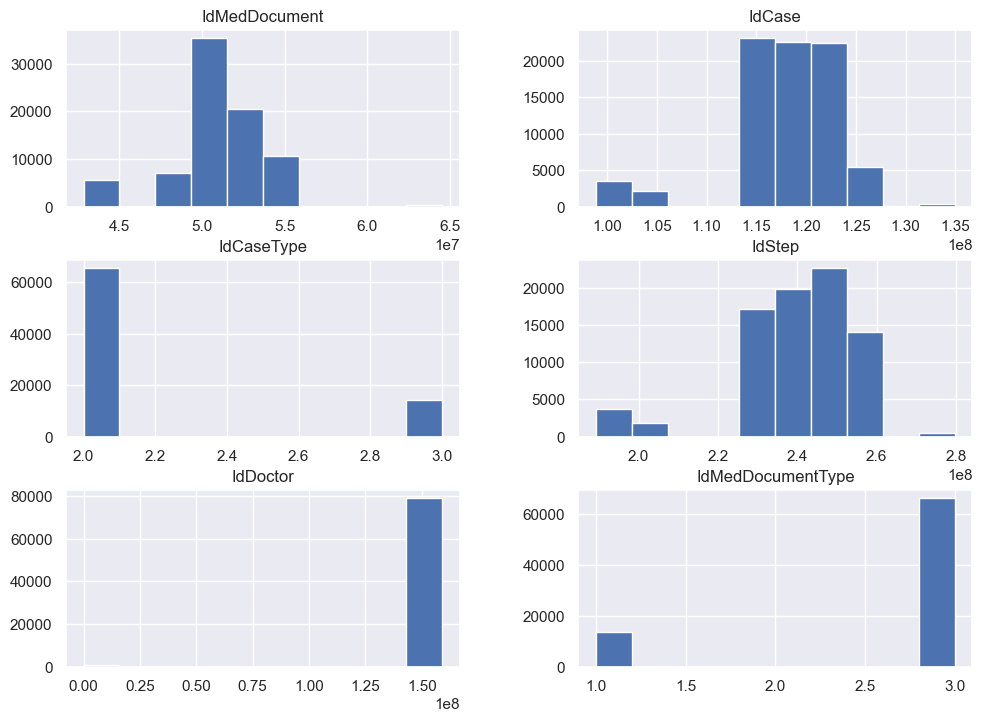

In [8]:
data.hist();

In [9]:
data['DocHead'].unique()[0:50]

array(['Лист осмотра {протокол осмотра} врача [п102.168]',
       '#rus#120- Врач общей практики', '#rus#Терапевт',
       'Лист осмотра {протокол осмотра} врача [п102.167]',
       'Лист Эпикриза [п102.167]',
       'Лист осмотра {протокол осмотра} врача [п98.119]',
       '#rus#Прием на дому',
       'Лист осмотра {протокол осмотра} врача [п98.93]',
       'Лист осмотра {протокол осмотра} врача [п99.16]',
       'Лист осмотра {протокол осмотра} врача [п116.135]',
       'Лист осмотра {протокол осмотра} врача [п116.444]',
       'Лист осмотра {протокол осмотра} врача [7]',
       'Лист осмотра {протокол осмотра} врача [п102.302]',
       'Лист осмотра {протокол осмотра} врача [п102.284]',
       'Лист осмотра {протокол осмотра} врача [148520]',
       'Лист осмотра {протокол осмотра} врача [15254]',
       'Лист осмотра {протокол осмотра} врача [п116.87]',
       'Лист осмотра {протокол осмотра} врача [п116.45]',
       'Лист осмотра {протокол осмотра} врача [п116.48]',
       'Лист о

In [10]:
for record in data['DocHead'].unique():
    print(record)

Лист осмотра {протокол осмотра} врача [п102.168]
#rus#120- Врач общей практики
#rus#Терапевт
Лист осмотра {протокол осмотра} врача [п102.167]
Лист Эпикриза [п102.167]
Лист осмотра {протокол осмотра} врача [п98.119]
#rus#Прием на дому
Лист осмотра {протокол осмотра} врача [п98.93]
Лист осмотра {протокол осмотра} врача [п99.16]
Лист осмотра {протокол осмотра} врача [п116.135]
Лист осмотра {протокол осмотра} врача [п116.444]
Лист осмотра {протокол осмотра} врача [7]
Лист осмотра {протокол осмотра} врача [п102.302]
Лист осмотра {протокол осмотра} врача [п102.284]
Лист осмотра {протокол осмотра} врача [148520]
Лист осмотра {протокол осмотра} врача [15254]
Лист осмотра {протокол осмотра} врача [п116.87]
Лист осмотра {протокол осмотра} врача [п116.45]
Лист осмотра {протокол осмотра} врача [п116.48]
Лист осмотра {протокол осмотра} врача [п116.179]
Лист осмотра {протокол осмотра} врача [п116.102]
Лист осмотра {протокол осмотра} врача [п116.439]
Лист осмотра {протокол осмотра} врача [п116.432]
Л

Нужна сегментация, сегментировать топикам текстовые записи и по сегментам попробовать векторизовать. Можно векторизовать по объему.

## Создание датасета

In [1]:
import re
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import spacy
from sentence_transformers import SentenceTransformer
from nltk.corpus import stopwords
import nltk

In [2]:
text = pd.read_excel('./new_data_almazov.xlsx')

In [3]:
# Загрузка ресурсов
nltk.download('stopwords')
stopwords_ru = set(stopwords.words("russian"))
nlp = spacy.load("ru_core_news_sm")
model = SentenceTransformer('paraphrase-multilingual-MiniLM-L12-v2')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\emil_\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\emil_\anaconda3\lib\site-packages\spacy\util.py:910: UserWarning: [W095] Model 'ru_core_news_sm' (3.8.0) was trained with spaCy v3.8.0 and may not be 100% compatible with the current version (3.7.2). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


In [4]:
# Функция базовой очистки текста
def clean_text(text):
    """Очищает текст: приводит к нижнему регистру, удаляет лишние символы и стоп-слова."""
    text = str(text).lower()  # Приведение к строке на случай NaN
    text = text.replace('_', ' ')
    text = re.sub(r'[^\w\s]', ' ', text, re.UNICODE)  # Замена всех ненужных символов на пробел
    text = re.sub(r'[^а-яё ]', ' ', text)  # Оставляем только русские буквы и пробелы
    doc = nlp(text)
    lemmas = [token.lemma_ for token in doc if token.text not in stopwords_ru]
    return re.sub(r'\s+', ' ', " ".join(lemmas)).strip()  # Замена любого количества пробелов на один

# # Функция улучшенной синтаксической сегментации
# def enhanced_syntactic_segmentation(text):
#     """
#     Разбивает текст на синтаксические сегменты, используя spaCy и дополнительные разделители.
#     """
#     segments = []
    
#     # Шаг 1: Разделение по строкам
#     initial_segments = text.split('\n')
    
#     for seg in initial_segments:
#         seg = seg.strip()
#         if not seg:
#             continue
            
#         # Шаг 2: Разделение по предложениям (spaCy)
#         doc = nlp(seg)
#         sents = [sent.text.strip() for sent in doc.sents if sent.text.strip()]
        
#         # Шаг 3: Дополнительное разбиение длинных предложений
#         for sent in sents:
#             # Если предложение короткое, добавляем его
#             if len(sent.split()) <= 10:
#                 segments.append(sent)
#                 continue
                
#             # Разбиваем по запятым, двоеточиям и точкам с запятой
#             sub_segments = re.split(r'[,:;]', sent)
#             sub_segments = [sub.strip() for sub in sub_segments if sub.strip()]
            
#             # Если разбиение дало мелкие куски, объединяем их
#             current_sub = ""
#             for sub in sub_segments:
#                 if len(sub.split()) < 2 and current_sub:
#                     current_sub += " " + sub
#                 else:
#                     if current_sub:
#                         segments.append(current_sub)
#                     current_sub = sub
#             if current_sub:
#                 segments.append(current_sub)
    
#     return [seg for seg in segments if seg]

# # Функция гибридной сегментации
# def hybrid_segmentation(text, similarity_threshold=0.3, min_segment_length=3, max_segment_length=50):
#     """
#     Гибридная сегментация текста с улучшенной синтаксической и семантической обработкой.
#     """
#     # Шаг 1: Синтаксическая сегментация
#     segments = enhanced_syntactic_segmentation(text)
    
#     if not segments:
#         print(f"Запись не сегментирована (пустая после фильтрации): {text[:50]}...")
#         return [text]
    
#     print(f"Запись: {text[:50]}... | Синтаксических сегментов: {len(segments)}")
    
    # Шаг 2: Семантическая сегментация
#     if len(segments) > 1:
#         embeddings = model.encode(segments)
#         similarities = cosine_similarity(embeddings)
        
#         final_segments = []
#         current_segment = segments[0]
        
#         for i in range(1, len(segments)):
#             sim = similarities[i-1, i]
#             if sim < similarity_threshold or len(current_segment.split()) > max_segment_length:
#                 if len(current_segment.split()) >= min_segment_length:
#                     final_segments.append(current_segment)
#                 current_segment = segments[i]
#             else:
#                 current_segment += " " + segments[i]
        
#         if len(current_segment.split()) >= min_segment_length:
#             final_segments.append(current_segment)
#         elif final_segments:
#             final_segments[-1] += " " + current_segment
#         else:
#             final_segments.append(current_segment)
        
#         print(f"Итоговых сегментов: {len(final_segments)}")
#         return final_segments
    
#     return segments

def simple_sentence_segmentation(text):
    """
    Разбивает текст на предложения, используя spaCy.
    """
    doc = nlp(text)
    # Используем list comprehension для получения текста каждого предложения
    # и убираем пустые строки на всякий случай
    sentences = [sent.text.strip() for sent in doc.sents if sent.text.strip()]
    return sentences

# Функция полной обработки текста
def process_text(text):
    """
    Обрабатывает текст: очищает и сегментирует на предложения.
    """
    # Сначала очищаем текст, чтобы избавиться от лишних символов и стоп-слов
    cleaned_text = clean_text(text)
    
    # Теперь разбиваем очищенный текст на предложения
    segments = simple_sentence_segmentation(cleaned_text)
    
    # Возвращаем список обработанных сегментов.
    # Дополнительная очистка не нужна, так как мы уже сделали это выше.
    return segments

In [5]:
print(f"Изначальное количество записей: {len(text)}")

Изначальное количество записей: 44358


In [6]:
# Применяем обработку
text['processed_text'] = text['рекомендации общие'].apply(process_text)
text_exploded = text.explode('processed_text')
text_exploded = text_exploded[text_exploded['processed_text'] != '']
text_exploded = text_exploded[text_exploded['processed_text'].notna()]

In [7]:
print(f"Количество записей после обработки: {len(text_exploded)}")
print(text_exploded[['processed_text']].head(10))

Количество записей после обработки: 29585
                                         processed_text
4413  режим нагрузка общий рекомендация контроль дав...
4415  режим нагрузка общий рекомендация ограничение ...
4424  режим нагрузка общий рекомендация контроль дав...
4454  режим нагрузка общий рекомендация контроль ад ...
4514  режим нагрузка общий рекомендация контроль дав...
4559  режим нагрузка общий рекомендация контроль дав...
4567  режим нагрузка общий рекомендация контроль дав...
4577  режим нагрузка общий рекомендация ежедневный к...
4585  режим нагрузка общий рекомендация ежедневный к...
4590  режим нагрузка общий рекомендация контроль ад ...


In [8]:
text_exploded = text_exploded[text_exploded['processed_text'].str.strip() != '']

In [10]:
text_exploded.columns

Index(['Регистрационный номер', 'Номер эпизода', 'Пол', 'возраст',
       'найдено в разделах', 'диета', 'найдено в диете', 'рекомендации общие',
       'найдено в рекомендациях общих', 'рекомендации дополнительные',
       'найдено в рекомендациях дополнительных', 'медикаментозная терапия',
       'найдено в медикаментозной терапии', 'консультации специалистов',
       'найдено в консультациях специалистов', 'лабораторные исследования',
       'найдено в лабораторных исследованиях', 'инструментальные исследования',
       'найдено в инструментальных исследованиях',
       'рекомендации неструктурированные',
       'найдено в рекомендациях неструктурированных', 'Код диагноза',
       'стадия заболевания', 'степень тяжести', 'АГ',
       'контролируемость расчётная', 'Описание диагноза', 'Код отделения',
       'ФИО специалиста', 'Дата время выполнения',
       'артериальное давление на правой руке систолическое',
       'артериальное давление на правой руке диастолическое',
       'арт

In [13]:
text_exploded = text_exploded[['Регистрационный номер', 'Номер эпизода', 'ФИО специалиста', 'Дата время выполнения', 'processed_text']]

In [14]:
text_exploded = text_exploded[text_exploded['processed_text'].apply(lambda x: len(x.split())) > 2]

In [15]:
text_exploded.head()

,Регистрационный номер,Номер эпизода,ФИО специалиста,Дата время выполнения,processed_text
4413,6612/A19,13654/А2019,Гордеева Мария Сергеевна,2019-03-06 15:00:00.000,режим нагрузка общий рекомендация контроль дав...
4415,5382/A19,NaN,Гордеева Мария Сергеевна,2019-03-06 15:30:00.000,режим нагрузка общий рекомендация ограничение ...
4424,16663/A19,NaN,Гордеева Мария Сергеевна,2019-03-06 17:30:00.000,режим нагрузка общий рекомендация контроль дав...
4454,16322/A19,NaN,Гордеева Мария Сергеевна,2019-03-07 18:00:00.000,режим нагрузка общий рекомендация контроль ад ...
4514,18353/A19,NaN,Гордеева Мария Сергеевна,2019-03-12 12:30:00.000,режим нагрузка общий рекомендация контроль дав...


In [16]:
text_exploded.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 28124 entries, 4413 to 44357
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Регистрационный номер  28124 non-null  object
 1   Номер эпизода          17306 non-null  object
 2   ФИО специалиста        28124 non-null  object
 3   Дата время выполнения  28124 non-null  object
 4   processed_text         28124 non-null  object
dtypes: object(5)
memory usage: 1.3+ MB


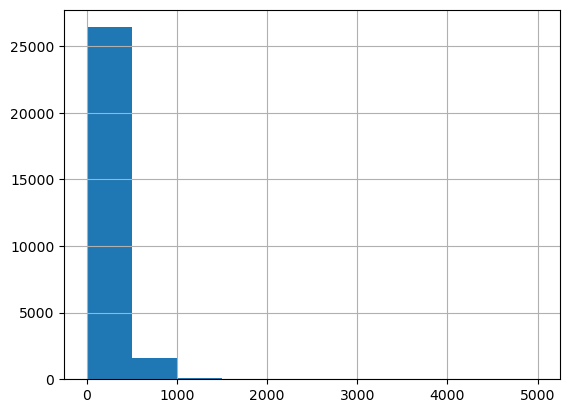

In [17]:
text_exploded['processed_text'].apply(len).hist(range=(0, 5000));

In [18]:
text_exploded.reset_index(drop=True, inplace=True)

In [19]:
text_exploded.to_csv('processed_text_almazov.csv', index=False)